# Electric Vehicles (EV) Battery Charging environment

This notebook describes the operation of the EVCharge environment, designed as a multi-agent scenario where the agents are charging stations that must meet the energy requirements of a previously-scheduled group of PEVs (Plug-in Electric Vehicles), constrained to a local power supply restriction, and a global restriction from the containing Load Area.

This code and plant are a Deep Learning implementation of the MPC approach described in this paper: 
https://www.researchgate.net/publication/337643000_Decentralised_Model_Predictive_Control_of_Electric_Vehicles_Charging

## Initialization

In [1]:
import numpy as np
import pandas as pd
from pev_battery_charge.envs.PEVBatteryCharge import PEVBatteryCharge
from pdb import set_trace
from pev_battery_charge.envs.config_pev import get_config 

### Configuration
The parameters for the generation of the environments are imported from a configuration file, and they can be inserted as `argparse` arguments, to ease automated training. The environment initializes by default most of the 

In [2]:
config = get_config(notebook=True)

In [3]:
config

Namespace(P_max=200, P_min=0, algorithm_name='mappo_gru', attn=False, attn_N=1, attn_heads=4, attn_only_critic=False, attn_size=64, charge_duration_tolerance=0.2, charge_time_desired=180, clip_param=0.2, colab=False, cuda=True, cuda_deterministic=True, data_chunk_length=10, dropout=0.0, entropy_coef=0.01, env_name='MPE', episode_length=25, eps=1e-05, eval=False, eval_episodes=32, eval_interval=25, gae_lambda=0.95, gain=0.01, gamma=0.99, hidden_size=64, huber_delta=10.0, ifi=0.333333, initial_charge_max=0.5, layer_N=1, log_console=20, log_interval=5, lr=0.0007, max_grad_norm=20.0, model_dir=None, n_pevs=20, n_rollout_threads=4, n_training_threads=12, naive_recurrent_policy=False, num_agents=20, num_env_steps=10000000.0, num_mini_batch=1, p_max=22, p_min=0, ppo_epoch=15, random_start_coeff=1, recurrent_N=1, recurrent_policy=True, restore_model=False, restore_model_path=None, reward_weights=[1, 1, 1], sampling_time=5, save_gifs=True, save_gifs_interval=200, save_interval=150, seed=1, shar

# Environment



In [4]:
env = PEVBatteryCharge(args=config)
env.__dict__

{'n_pevs': 20,
 'num_agents': 20,
 'p_max': 22,
 'p_min': 0,
 'soc_ref': 24,
 'charge_time_desired': 180,
 'soc_initial': 0,
 'soc_max': 24,
 'xi': 0.1,
 'P_max': 200,
 'P_min': 0,
 'seed': 1,
 'rew_weights': [1, 1, 1],
 'area': <pev_battery_charge.envs.PEVChargeCore.LoadArea at 0x1ba65461668>,
 'pevs': [<pev_battery_charge.envs.PEVChargeCore.PEV at 0x1ba6546b198>,
 'charge_stations': [<pev_battery_charge.envs.PEVChargeCore.ChargeStation at 0x1ba65461da0>,
 'sampling_time': 5,
 'total_time': 960,
 'charge_duration_tolerance': 0.2,
 'initial_charge_max': 0.5,
 'random_start_coeff': 1,
 'total_timesteps': 192,
 'action_space': [Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, (1,), float32),
  Box(0.0, inf, 

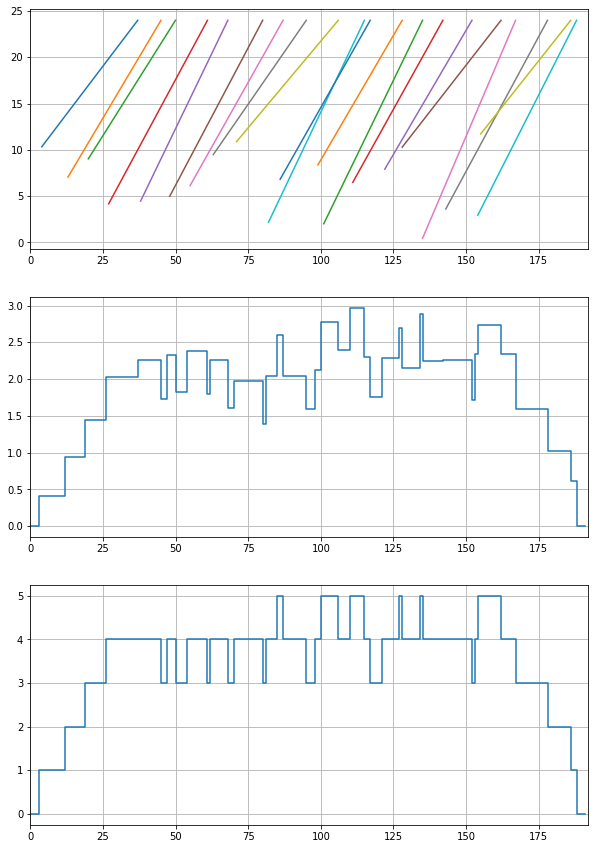

In [5]:
from time import sleep

for _ in range(10):
    #sleep(1)
    env.build_random_schedule()
    env.compute_greedy_charge()
    env.compute_power_ideal()
    env.compute_pev_plugin()
    env.plot_simulation(plots=[1,2,3])

### Observation space

It collects information available for the charging station to predict its next power value to apply.
It is formed by the following elements:
1. `cs.p_min`: Minimum CS power allowed
1. `cs.p_max`: Maximum CS power allowed
1. `area.P_max`: Maximum area load power allowed
1. `area.P_min`: Minimum area load power allowed
1. `cs.plugged`: Station plugged or not
1. `soc_remain`: $SOC$ level remaining (kWh)
1. `area.P`: Current agregated power of the area (kW)
1. `action_last`: Last applied action (Maybe)

Elements from 1 to 4 might vary over a simulation, but usually they not. 

In [8]:
actions = [space.sample() for space in env.action_space]

#set_trace()
obs, rewards, info, done =  env.step(actions)
obs

[[0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 

In [9]:
obs

[[0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 22.37155294418335],
 [0, 22, 200, False, 0, 187.0, 

In [10]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plug-in schedule

In [11]:
cs_schedule = pd.DataFrame(env.cs_schedule)
cs_schedule.iloc[30:50]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
30,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
32,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
33,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
34,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
35,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
36,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
37,0,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
38,4,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
39,4,1,2,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


## 4 Agents, 10 PEVs

In [12]:
config.num_agents = 4
config.n_pevs = 10
env = PEVBatteryCharge(args=config)
#env.__dict__

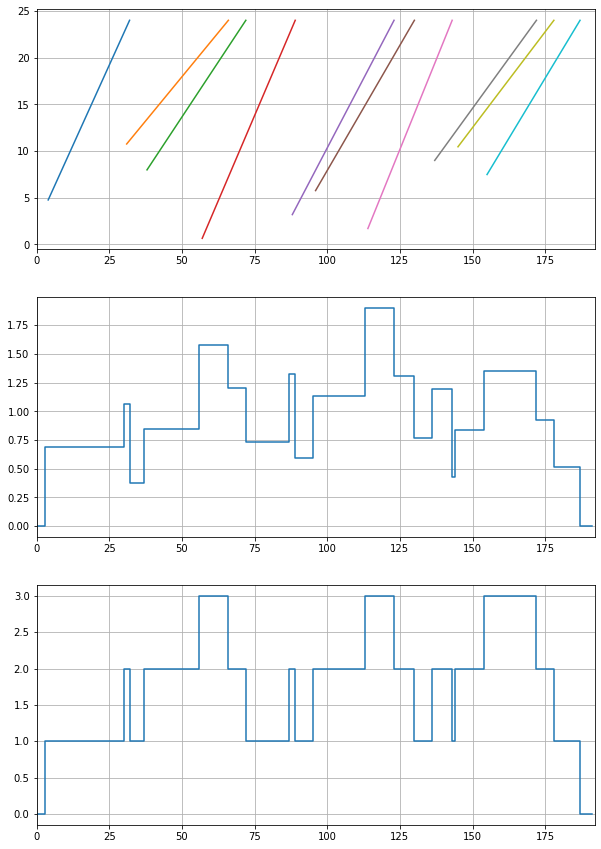

In [13]:
from time import sleep

for _ in range(10):
    #sleep(1)
    env.build_random_schedule()
    env.compute_greedy_charge()
    env.compute_power_ideal()
    env.compute_pev_plugin()
    env.plot_simulation(plots=[1,2,3])

In [14]:
cs_schedule = pd.DataFrame(env.cs_schedule)
cs_schedule.iloc[30:50]

,0,1,2,3
30,0,-1,-1,-1
31,0,1,-1,-1
32,0,1,-1,-1
33,-1,1,-1,-1
34,-1,1,-1,-1
35,-1,1,-1,-1
36,-1,1,-1,-1
37,-1,1,-1,-1
38,2,1,-1,-1
39,2,1,-1,-1
